# Librerías utilizadas:

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Importación de data set

In [69]:
data = pd.read_csv('c:\\Users\\Nico\\Desktop\\PyE/DataSet.csv')
control_group = data[data['Grupo'] == 'Control']['Presion_arterial_despues']
experimental_group = data[data['Grupo'] == 'Experimental']['Presion_arterial_despues']

# Analisis estadistico
* Descripción de los datos: se utiliza 'groupby' y 'describe' de pandas para obtener estadisticas descriptivas de cada grupo (media, desviación estandar, percentiles, etc).

In [70]:
summary = data.groupby('Grupo')['Presion_arterial_despues'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
Control,96.0,144.551668,11.203163,119.523128,137.582893,143.902696,152.557428,170.313819
Experimental,104.0,143.862804,13.171118,110.197581,135.738183,144.459719,153.329000,170.143959


* Prueba t de Student para medias independientes: Queremos saber si la diferencia en la presión arterial entre los dos grupos es estadísticamente significativa.
* La hipotesis nula es que no hay diferencia en las medias de los dos grupos
* El valor 'p' indica la probabilidad de observar una diferencia al menos tan extrema como la observada, asumiendo que la hipótesis nula es verdadera. Un valor bajo (por ej. < 0.05) indica que podemos rechazar la hipótesis nula

In [71]:
t_stat, p_value = stats.ttest_ind(control_group, experimental_group)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.3967846793066934, P-value: 0.6919535828770337


* Intervalo de confianza para la diferencia de medias: se calcula un intervalo del 95% para la diferencia de medias utilizando la distribución normal

In [72]:
mean_control = control_group.mean()
mean_experimental = experimental_group.mean()

se_control = stats.sem(control_group)
se_experimental = stats.sem(experimental_group)

ci_control = stats.t.interval(0.95, len(control_group)-1, loc=mean_control, scale=se_control)
ci_experimental = stats.t.interval(0.95, len(experimental_group)-1, loc=mean_experimental, scale=se_experimental)

print(f"Intervalo de confianza del 95% para la media del grupo Control: {ci_control}")
print(f"Intervalo de confianza del 95% para la media del grupo Experimental: {ci_experimental}")

Intervalo de confianza del 95% para la media del grupo Control: (142.28169623628358, 146.82164004125755)
Intervalo de confianza del 95% para la media del grupo Experimental: (141.30135048518773, 146.424258072683)


* Prueba Chi-Cuadrado para la variable categórica 'Historial_presion_alta'

In [73]:
data = pd.get_dummies(data, columns=['Sexo', 'Grupo'], drop_first=True)

X = data[['Edad', 'Sexo_Masculino', 'Historial_presion_alta', 'Dosis_medicamento', 
          'Duracion_tratamiento', 'Presion_arterial_antes', 'Grupo_Experimental']]

y = data['Presion_arterial_despues']

X = sm.add_constant(X)


model = sm.OLS(y, X.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Presion_arterial_despues   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                 -0.028
Method:                       Least Squares   F-statistic:                    0.2216
Date:                      Tue, 23 Jul 2024   Prob (F-statistic):              0.980
Time:                              12:28:12   Log-Likelihood:                -783.43
No. Observations:                       200   AIC:                             1583.
Df Residuals:                           192   BIC:                             1609.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    141.1954     14.494      9.742      0.000     112.608     169.783
Edad                      -0.0416      0.063     -0.665      0.507      -0.165       0.082
Sexo_Masculino             0.6641      1.767      0.376      0.708      -2.822       4.150
Historial_presion_alta     0.3448      1.781      0.194      0.847      -3.169       3.858
Dosis_medicamento         -0.0559      0.107     -0.520      0.603      -0.268       0.156
Duracion_tratamiento       0.1346      0.286      0.470      0.639      -0.430       0.699
Presion_arterial_antes     0.0354      0.089      0.399      0.690      -0.139       0.210
Grupo_Experimental        -0.5419      1.805     -0.300      0.764      -4.103       3.019
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.367
Skew:                          -0.019   Prob(JB):                        0.832
Kurtosis:                       2.794   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualización de los resultados

* Histograma de la presión arterial

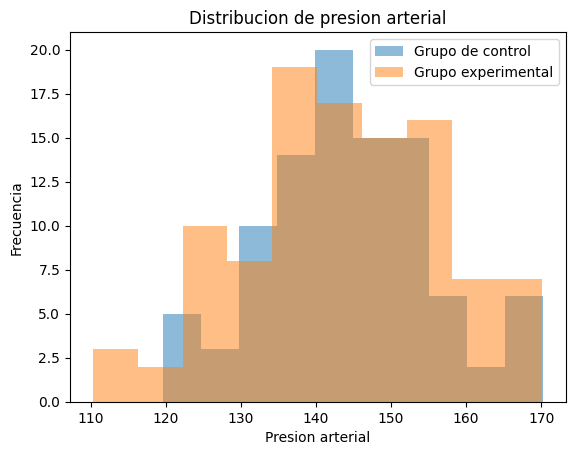

In [74]:
plt.hist(control_group, alpha=0.5, label='Grupo de control')
plt.hist(experimental_group, alpha=0.5, label='Grupo experimental')
plt.legend(loc='upper right')
plt.xlabel('Presion arterial')
plt.ylabel('Frecuencia')
plt.title('Distribucion de presion arterial')
plt.show()